In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
from tensorflow import keras
import sys
sys.path.append("./src")
from util import *
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [2]:
param_path = "./config/age_parameters.json"
with open(param_path) as f:
    all_info = json.load(f)
f.close()

model_param = all_info["model_param"]
save_path = model_param["save_path"]
log_path = model_param["log_path"]

In [ ]:
age_log = pd.read_csv(log_path)

In [ ]:
def generate_curves(log_path, target):
    df = pd.read_csv(log_path)
    path_to_viz = os.path.join("./visualization/training_progress", target)
    acc_name = os.path.join(path_to_viz, "acc_curve")
    loss_name = os.path.join(path_to_viz, "loss_curve")
    
    ax = plt.gca()
    plt.plot(df["accuracy"])
    plt.plot(df["val_accuracy"])
    plt.title("Training Accuracy vs. Validation Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    ax.legend(['Train','Validation'],loc='lower right')
    plt.savefig(acc_name)
    plt.close()
    
    ax = plt.gca()
    plt.plot(df["loss"])
    plt.plot(df["val_loss"])
    plt.title("Training loss vs. Validation loss")
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    ax.legend(['Train','Validation'],loc='upper right')
    plt.savefig(loss_name)

In [3]:
model = keras.models.load_model(save_path)

In [4]:
train_label_path, train_image_path, valid_label_path, valid_image_path, target, size = all_info["load_data"].values()
lr, epochs, batch_size, mapping_path, save_path, log_path = model_param.values()

valid_gen = create_generator(valid_label_path,
                                 valid_image_path,
                                 target,
                                 size,
                                 batch_size,
                                 mapping_path,
                                 resnet_v2.preprocess_input, ##change this
                                 is_training = False)


Found 10954 validated image filenames belonging to 9 classes.


In [5]:
pred = model.predict(valid_gen)

In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def create_stats(model, generator, label_df, target, target_map, save_path):
    pred = model.predict(generator).argmax(axis = 1)
    ground_truth = label_df[target].replace(target_map).values
    cr = classification_report(ground_truth, pred_arg, target_names = target_map.keys())
    
    with open(os.path.join(save_path, "class_report.txt"), "w") as f:
        f.write(cr)
    f.close()
    
    cr = classification_report(ground_truth, pred_arg, target_names = target_map.keys(), output_dict = True)
    
    result_df = pd.DataFrame(cr).T.iloc[:len(target_map), :]
    result_df = result_df.reset_index().rename(columns= {"index": "category"})

    cm = confusion_matrix(ground_truth, pred_arg)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    acc = cm.diagonal()
    result_df["accuracy"] = acc
    
    stat_names = ["precision", "recall", "f1-score", "accuracy", "support"]
    
    for name in stat_names:
        save_dir = os.path.join(save_path, name + "_barplot")
        plt.figure(figsize = (12,8))
        sns.barplot(x = "category", y= name, data= result_df,linewidth=2.5, 
                    facecolor=(1, 1, 1, 0), edgecolor="0")
        plt.title("{} across {}".format(name, target), fontsize = 20)
        plt.xlabel(target, fontsize = 16)
        plt.ylabel(name, fontsize= 16)
        plt.savefig(save_dir)    
    
    
    
    
    

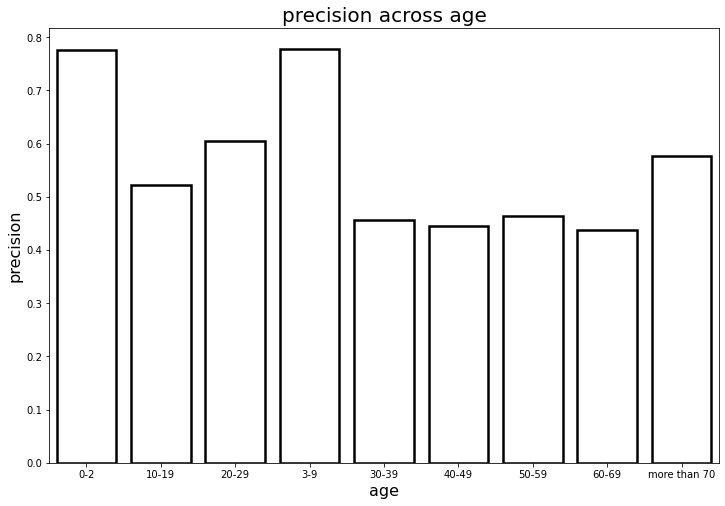

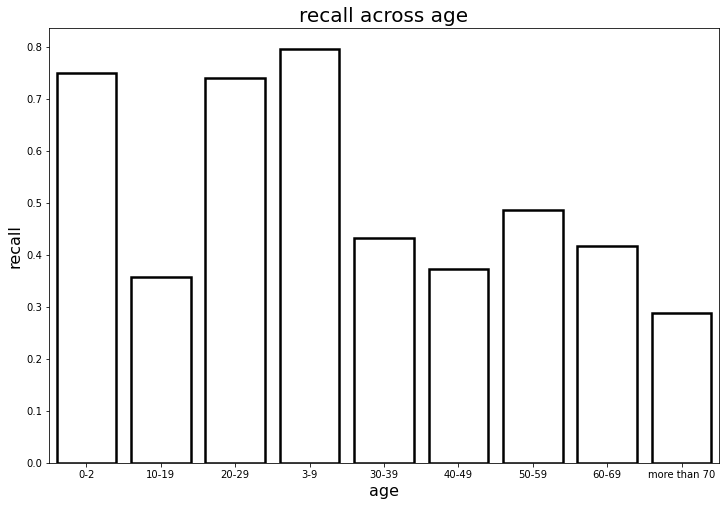

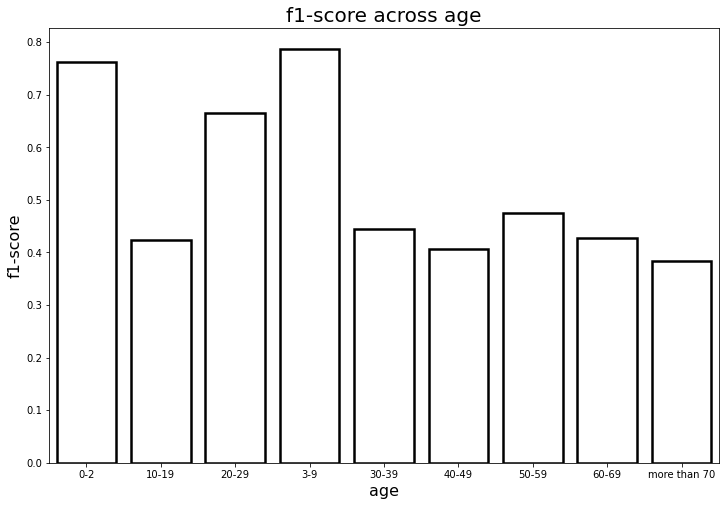

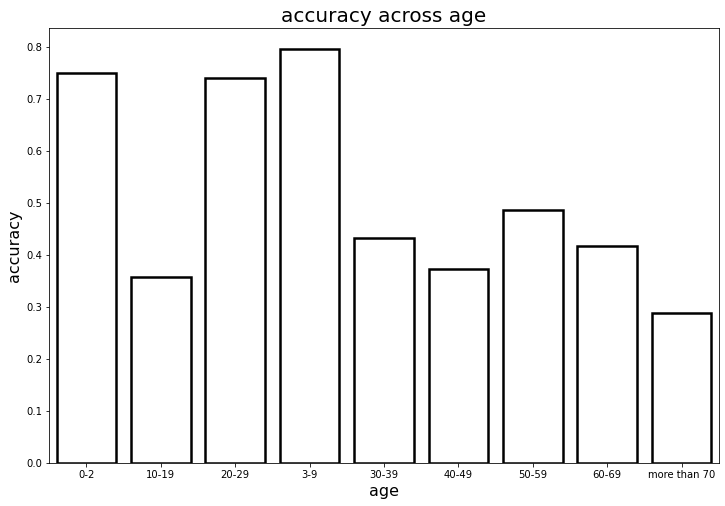

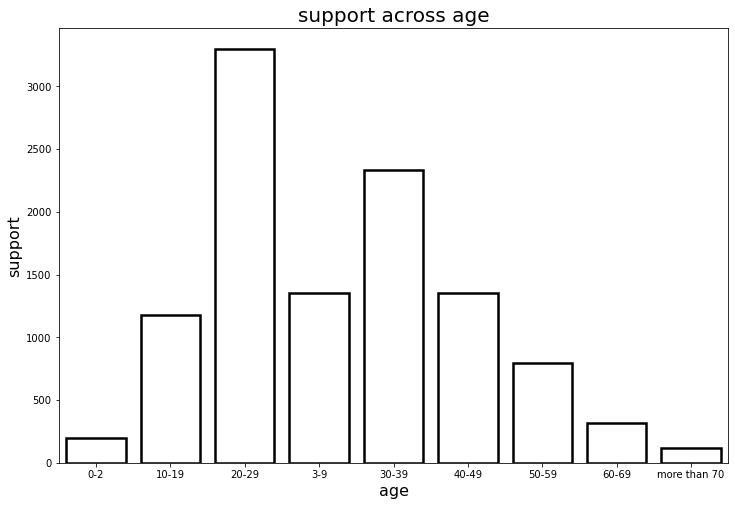

In [123]:
create_stats(model, valid_gen, pd.read_csv(valid_label_path), "age", age_map, "./visualization/age/training_progress")

In [6]:

with open(mapping_path) as f:
    age_map = json.load(f)
f.close()
#age_map = {val:key for key, val in age_map.items()}

In [7]:
pred_arg = pred.argmax(axis = 1)
ground_truth = pd.read_csv(valid_label_path)["age"].replace(age_map).values
pred_arg

array([3, 5, 5, ..., 7, 2, 6])

In [10]:
age_map_rev = {val:key for key, val in age_map.items()}

{0: '0-2',
 1: '10-19',
 2: '20-29',
 3: '3-9',
 4: '30-39',
 5: '40-49',
 6: '50-59',
 7: '60-69',
 8: 'more than 70'}

In [29]:
from sklearn.metrics import classification_report

cr_age = classification_report(ground_truth, pred_arg, target_names=age_map.keys(), output_dict = True)

#with open("./test.txt", "w") as f:
#    f.write(cr_age)

In [58]:
a = pd.DataFrame(cr_age).T
a = a.iloc[:9, :]
a = a.reset_index()
a

,index,precision,recall,f1-score,support
0,0-2,0.776042,0.748744,0.762148,199.0
1,10-19,0.521632,0.357324,0.424121,1181.0
2,20-29,0.605557,0.739697,0.665939,3300.0
3,3-9,0.778659,0.796460,0.787459,1356.0
4,30-39,0.456689,0.432189,0.444101,2330.0
5,40-49,0.446113,0.373245,0.406439,1353.0
6,50-59,0.464586,0.486181,0.475138,796.0
7,60-69,0.437908,0.417445,0.427432,321.0
8,more than 70,0.576271,0.288136,0.384181,118.0


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [51]:
cm = confusion_matrix(ground_truth, pred_arg)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [52]:
cm.diagonal()

array([0.74874372, 0.3573243 , 0.73969697, 0.79646018, 0.43218884,
       0.37324464, 0.4861809 , 0.41744548, 0.28813559])

Text(0.5, 1.0, 'index')

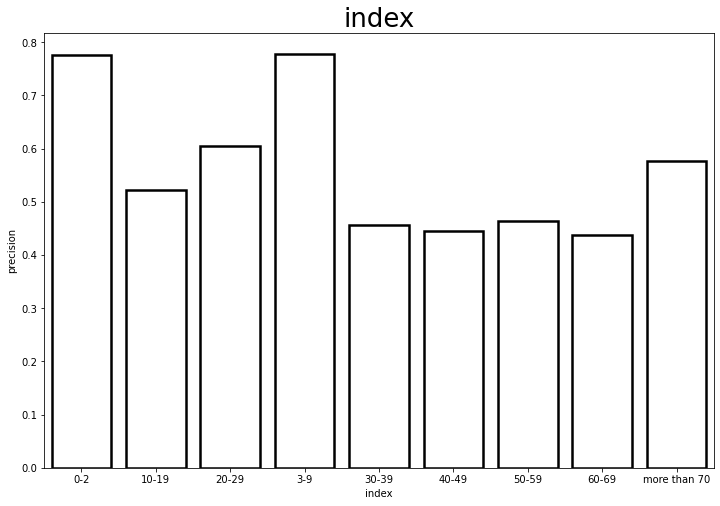

In [119]:
plt.figure(figsize = (12,8))
sns.barplot(x = "index", y="precision", data=a,linewidth=2.5, facecolor=(1, 1, 1, 0),
                  edgecolor="0")
plt.title("index", fontsize = 26)